# Business Problem:
The  business case is on the inventory management. Keeping
Inventory of spare in various service centre to the market demand is
always a challenge as most service centres spends significant amount
in spare parts inventory costs. In spite of this, availability of spare
parts is been one of the problem areas.


# PROJECT GOAL:
Creating Predictive model for inventory forecasting so that
service centre achieve JIT standards.

# Loading Libraries

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plot

# 1) Loading the data

In [3]:
data=pd.read_excel('data.xlsx')

In [4]:
data.head(2)

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL


# 2)Data Cleaning

- Droping Nan values
- Changing Column names

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28484 entries, 0 to 28483
Data columns (total 7 columns):
Invoice Date             28482 non-null datetime64[ns]
Job Card Date            28482 non-null datetime64[ns]
Business Partner Name    28484 non-null object
Vehicle No.              28484 non-null object
Vehicle Model            28482 non-null object
Current KM Reading       28482 non-null float64
INVOICE LINE TEXT        28449 non-null object
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 1.5+ MB


# Droping Nan values

In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28448 entries, 0 to 28481
Data columns (total 7 columns):
Invoice Date             28448 non-null datetime64[ns]
Job Card Date            28448 non-null datetime64[ns]
Business Partner Name    28448 non-null object
Vehicle No.              28448 non-null object
Vehicle Model            28448 non-null object
Current KM Reading       28448 non-null float64
INVOICE LINE TEXT        28448 non-null object
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 1.7+ MB


# Changing column names

In [8]:
new_data=data.rename(columns={'Invoice Date':'Invoice_Date',
                             'Job Card Date':'Job_Card_Date', 
                                  'Business Partner Name': 'Business_Partner_Name',
                             'Vehicle No.':'Vehicle_No.',
                             'Vehicle Model':'Vehicle_Model',
                             'Current KM Reading':'Current_KM_Reading',
                             'INVOICE LINE TEXT':'INVOICE_LINE_TEXT'})
data.columns = ['Invoice_Date','Job_Card_Date', 'Business_Partner_Name','Vehicle_No.','Vehicle_Model','Current_KM_Reading','INVOICE_LINE_TEXT']

In [9]:
new_data.head(10)

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No.,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL
5,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CHAIN LUBRICATION
6,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,4 WAY SWITCH
7,2017-05-31,2017-05-31,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,ENGINE OIL
8,2017-05-31,2017-05-31,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,3M OIL
9,2017-05-31,2017-05-31,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,CHAIN LUBRICATION


# 3)Data visualizations

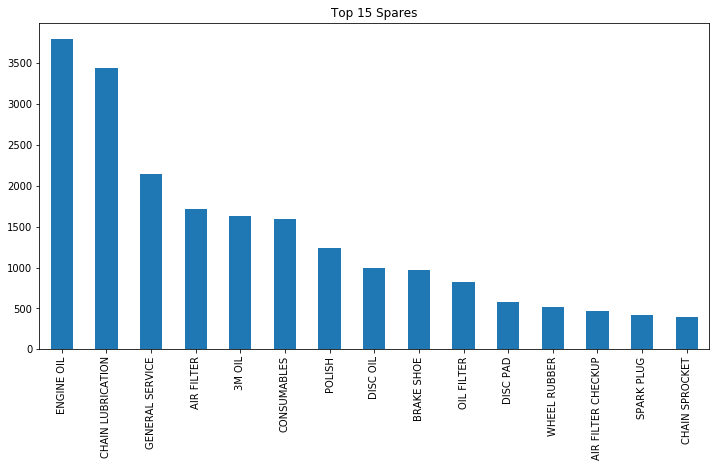

In [10]:
# Top 10 most Invoice_Line_Parts names
plot = data.INVOICE_LINE_TEXT.value_counts().nlargest(15).plot(kind='bar', title="Top 15 Spares", figsize=(12,6))

- Engine oil,Chain Lubrication,Air Filter,3M OIL,POLISH and so on.
- Even General Service and Consumables also have some parts in it so iam not droping

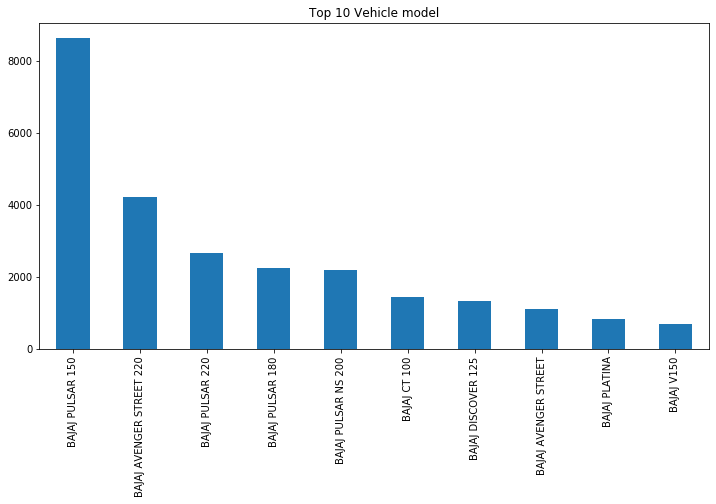

In [11]:
# Top 10 most Invoice_Line_Parts names
plot = data.Vehicle_Model.value_counts().nlargest(10).plot(kind='bar', title="Top 10 Vehicle model", figsize=(12,6))

- Bajaj Pulsar 150,Bajaj Avenger Street 220 and so on are top 10 Vehcile Model

# Counts of Invoice Line Text

In [12]:
new_data.INVOICE_LINE_TEXT.value_counts()

ENGINE OIL              3802
CHAIN LUBRICATION       3441
GENERAL SERVICE         2142
AIR FILTER              1715
3M OIL                  1628
CONSUMABLES             1595
POLISH                  1245
DISC OIL                 991
BRAKE SHOE               965
OIL FILTER               821
DISC PAD                 575
WHEEL RUBBER             521
AIR FILTER CHECKUP       467
SPARK PLUG               421
CHAIN SPROCKET           396
SPROCKET RUBBER          347
SPROCKET BEARING         314
CHAIN OVERHAUL           284
CLUTCH CABLE             263
CLUTCH ASSEMBLY          212
CLUTCH COVER GASKET      190
CLUTCH OVERHUAL          163
TANK COVER               134
LABOUR                   131
SEAT COVER               119
INDICATOR                110
DISC PUMP KIT            104
DRUM BOLT                103
TAIL LAMP BULB           101
FOOT REST                 99
                        ... 
O RING KIT                 1
BRAKE PEDAL RUBBER         1
SEAT COWL STICKER          1
SIDE MASK     

# Different Bike has different spare parts required depending upon that top 15 parts are taken down

In [13]:
sp=new_data.groupby(['Vehicle_Model', 'INVOICE_LINE_TEXT']).size().nlargest(15)
print(sp)

Vehicle_Model             INVOICE_LINE_TEXT
BAJAJ PULSAR 150          ENGINE OIL           1066
                          CHAIN LUBRICATION     970
                          GENERAL SERVICE       654
BAJAJ AVENGER STREET 220  ENGINE OIL            591
BAJAJ PULSAR 150          AIR FILTER            554
BAJAJ AVENGER STREET 220  CHAIN LUBRICATION     540
BAJAJ PULSAR 150          3M OIL                400
                          BRAKE SHOE            386
                          CONSUMABLES           386
BAJAJ AVENGER STREET 220  GENERAL SERVICE       379
BAJAJ PULSAR 220          ENGINE OIL            338
BAJAJ PULSAR 150          DISC OIL              322
                          POLISH                319
BAJAJ PULSAR 180          ENGINE OIL            303
BAJAJ AVENGER STREET 220  AIR FILTER            301
dtype: int64


In [14]:
sp.reset_index(name='size')

,Vehicle_Model,INVOICE_LINE_TEXT,size
0,BAJAJ PULSAR 150,ENGINE OIL,1066
1,BAJAJ PULSAR 150,CHAIN LUBRICATION,970
2,BAJAJ PULSAR 150,GENERAL SERVICE,654
3,BAJAJ AVENGER STREET 220,ENGINE OIL,591
4,BAJAJ PULSAR 150,AIR FILTER,554
5,BAJAJ AVENGER STREET 220,CHAIN LUBRICATION,540
6,BAJAJ PULSAR 150,3M OIL,400
7,BAJAJ PULSAR 150,BRAKE SHOE,386
8,BAJAJ PULSAR 150,CONSUMABLES,386
9,BAJAJ AVENGER STREET 220,GENERAL SERVICE,379


In [15]:
# create a new column, date_parsed, with the parsed dates
new_data['Invoice_Date'] = pd.to_datetime(new_data['Invoice_Date'], format = "%m/%d/%y")
# create a new column, date_parsed, with the parsed dates
new_data['Job_Card_Date'] = pd.to_datetime(new_data['Job_Card_Date'], format = "%m/%d/%y")

In [16]:
new_data.head(10)

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No.,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL
5,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CHAIN LUBRICATION
6,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,4 WAY SWITCH
7,2017-05-31,2017-05-31,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,ENGINE OIL
8,2017-05-31,2017-05-31,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,3M OIL
9,2017-05-31,2017-05-31,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,CHAIN LUBRICATION


In [17]:
new_data.set_index('Invoice_Date').resample('1Y').sum().head()

,Current_KM_Reading
Invoice_Date,
2017-12-31,166947546.0
2018-12-31,374986832.0
2019-12-31,8188285.0


In [18]:
new_data.Invoice_Date.max()

Timestamp('2019-01-06 00:00:00')

# 4)Time series

# Grouping of all parts

In [19]:
new_data.groupby(['Invoice_Date'])['Vehicle_Model', 'INVOICE_LINE_TEXT'].size().reset_index(name='counts')

,Invoice_Date,counts
0,2017-05-30,1
1,2017-05-31,10
2,2017-06-01,39
3,2017-06-02,24
4,2017-06-03,46
5,2017-06-04,32
6,2017-06-05,57
7,2017-06-06,55
8,2017-06-07,41
9,2017-06-08,18


In [20]:
pp=new_data.groupby(['Invoice_Date'])['Vehicle_Model', 'INVOICE_LINE_TEXT'].size()
print(pp)


Invoice_Date
2017-05-30      1
2017-05-31     10
2017-06-01     39
2017-06-02     24
2017-06-03     46
2017-06-04     32
2017-06-05     57
2017-06-06     55
2017-06-07     41
2017-06-08     18
2017-06-09     22
2017-06-10    121
2017-06-11     14
2017-06-12     45
2017-06-13     46
2017-06-14    107
2017-06-15     57
2017-06-16     56
2017-06-17     29
2017-06-18     30
2017-06-19     28
2017-06-20     20
2017-06-21     29
2017-06-22     82
2017-06-23     49
2017-06-24     64
2017-06-25     38
2017-06-26     61
2017-06-27     27
2017-06-28     35
             ... 
2018-12-06     80
2018-12-07     90
2018-12-08     57
2018-12-10     23
2018-12-11     81
2018-12-12     51
2018-12-13     44
2018-12-14     65
2018-12-15    113
2018-12-16     20
2018-12-17     56
2018-12-18     86
2018-12-19    108
2018-12-20     80
2018-12-21     83
2018-12-22    113
2018-12-23     22
2018-12-24    111
2018-12-25     38
2018-12-26     49
2018-12-27     77
2018-12-28     83
2018-12-29     39
2018-12-30     

In [21]:
ps=pp.reset_index(name='total')
print(ps)

    Invoice_Date  total
0     2017-05-30      1
1     2017-05-31     10
2     2017-06-01     39
3     2017-06-02     24
4     2017-06-03     46
5     2017-06-04     32
6     2017-06-05     57
7     2017-06-06     55
8     2017-06-07     41
9     2017-06-08     18
10    2017-06-09     22
11    2017-06-10    121
12    2017-06-11     14
13    2017-06-12     45
14    2017-06-13     46
15    2017-06-14    107
16    2017-06-15     57
17    2017-06-16     56
18    2017-06-17     29
19    2017-06-18     30
20    2017-06-19     28
21    2017-06-20     20
22    2017-06-21     29
23    2017-06-22     82
24    2017-06-23     49
25    2017-06-24     64
26    2017-06-25     38
27    2017-06-26     61
28    2017-06-27     27
29    2017-06-28     35
..           ...    ...
525   2018-12-06     80
526   2018-12-07     90
527   2018-12-08     57
528   2018-12-10     23
529   2018-12-11     81
530   2018-12-12     51
531   2018-12-13     44
532   2018-12-14     65
533   2018-12-15    113
534   2018-12-16

# Weekly Sampling

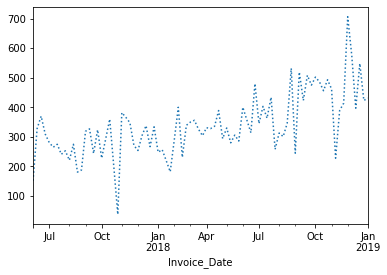

In [22]:
weekly=pp.resample('W').sum()
weekly.plot(style=[':','--','-'])

In [23]:
weekly.isnull().sum()

0

# Testing stationarity

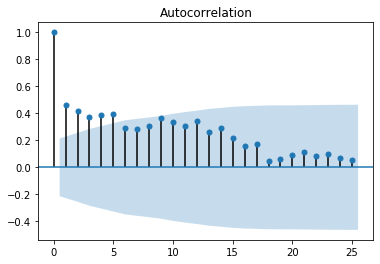

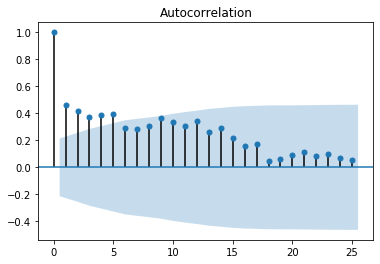

In [24]:
#Autocorrelation(p)
from  statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(weekly,lags=25)

#spiked decay shows data is stationary

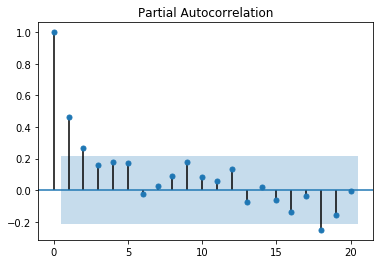

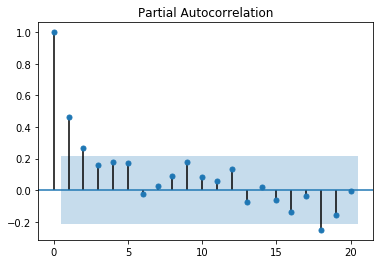

In [25]:
#partial auto correlation
plot_pacf(weekly,lags=20)

# Converting data to stationary format

Invoice_Date
2017-06-11    176.0
2017-06-18     42.0
2017-06-25    -60.0
2017-07-02    -29.0
2017-07-09    -16.0
Freq: W-SUN, dtype: float64


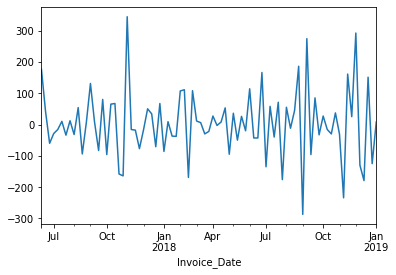

In [26]:
weekly_diff=weekly.diff(periods=1)
#integrated of order 1,denoted by d (for diff),one of the parameter
weekly_diff=weekly_diff[1:]
print(weekly_diff.head())
weekly_diff.plot()
#shows fluctationsaround mean values

In [27]:
X=weekly_diff.values
X.size

83

# 4.1)Algorithm Autoregressive Model

In [28]:
X=weekly_diff.values
train=X[0:62]
test=X[62:]
predictions=[]

In [29]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar=AR(train)
model_ar_fit=model_ar.fit()

In [30]:
predictions=model_ar_fit.predict(start=62,end=83)

In [31]:
test


array([  45.,  186., -287.,  274.,  -96.,   85.,  -33.,   27.,  -16.,
        -30.,   37.,  -31., -234.,  161.,   25.,  292., -130., -179.,
        151., -125.,    8.])

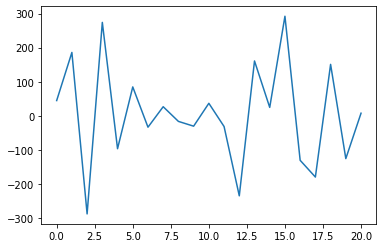

In [32]:
plt.plot(test)

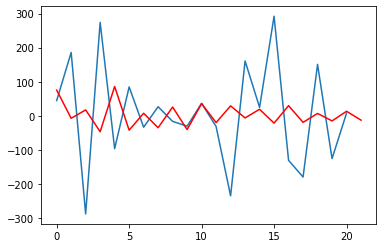

In [33]:
plt.plot(test)
plt.plot(predictions,color='red')

# 4.2 )Autoregressive integrated moving average

In [34]:
from statsmodels.tsa.arima_model import ARIMA

In [35]:
model_arima=ARIMA(train,order=(6,2,1))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

726.1342348606402


G:\Data science\anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [36]:
predictions=model_arima_fit.forecast(steps=21)[0]
predictions

array([-12.17026982, -54.86644925,  -3.58656104, -54.65720944,
         3.6551976 , -30.18714821, -36.27202718, -39.85321341,
       -18.12615256, -37.28735863, -29.10204384, -39.41025249,
       -37.61375143, -37.27307277, -34.11635   , -43.2603683 ,
       -41.69515984, -43.28860349, -43.1520481 , -45.31288178,
       -46.39918975])

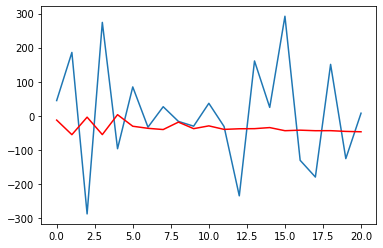

In [37]:
plt.plot(test)
plt.plot(predictions,color='red')

In [38]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq


[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [39]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima=ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 736.3856979754503
(0, 0, 1) 704.2553598733294
(0, 0, 2) 705.8639314529411
(0, 1, 0) 785.7412482601109
(0, 1, 1) 731.5580781545839
(0, 2, 0) 842.4964848772815
(0, 2, 1) 779.9696050562455
(1, 0, 0) 728.6217899346823
(1, 0, 1) 705.9665482942937
(1, 0, 2) 707.5835547092852
(1, 0, 3) 707.3108827675294
(1, 0, 4) 708.8859188228545
(1, 1, 0) 763.0305375928597
(1, 1, 3) 708.6637590381745
(1, 1, 4) 706.6942299746108
(1, 2, 0) 804.9131725339638
(2, 0, 0) 721.5256585392611
(2, 0, 1) 706.8252094765691
(2, 0, 2) 707.428539836174
(2, 0, 3) 709.3092499917161
(2, 0, 4) 708.9362455503917
(2, 1, 0) 749.4679320273588
(2, 1, 1) 718.3072700084194
(2, 2, 0) 785.88744983802
(3, 0, 0) 717.6879490232619
(3, 0, 1) 708.7779717648077
(3, 1, 0) 737.7730194682406
(3, 1, 1) 715.1818160476146
(3, 1, 4) 710.3977093722765
(3, 2, 0) 767.0930508974425
(4, 0, 0) 718.5554713824177
(4, 0, 1) 710.7216478250866
(4, 0, 2) 711.4288867723685
(4, 1, 0) 734.8571067714865
(4, 1, 1) 716.3370271616998
(4, 1, 2) 719.088772005

# 4.3) SARIMAX FORECAST

In [40]:
# Training the ARIMA model.
model = sm.tsa.statespace.SARIMAX(weekly_diff, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4448      0.124     -3.594      0.000      -0.687      -0.202
ma.L1         -1.0000      0.201     -4.985      0.000      -1.393      -0.607
ar.S.L12      -0.4446      0.116     -3.832      0.000      -0.672      -0.217
sigma2      1.308e+04   1.53e-05   8.53e+08      0.000    1.31e+04    1.31e+04


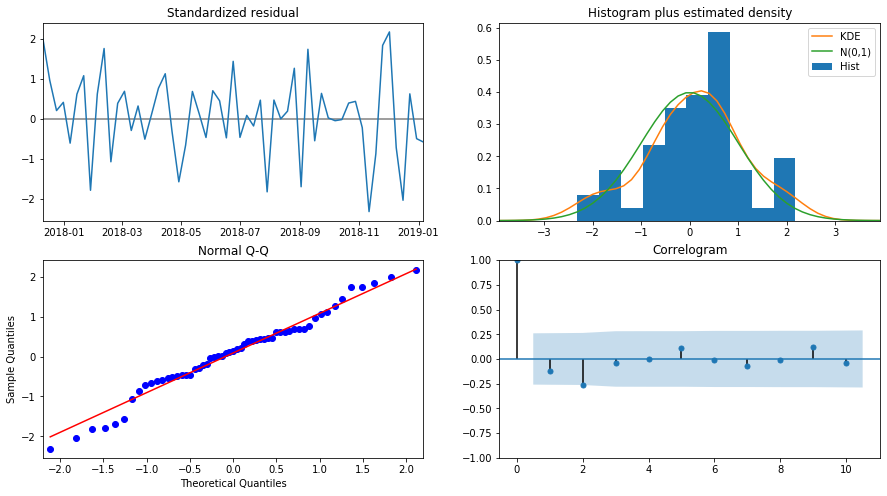

In [41]:
results.plot_diagnostics(figsize=(15, 8))
plt.show()

                 lower y     upper y
Invoice_Date                        
2018-11-04   -232.462070  220.476183
2018-11-11   -192.987596  259.858450
2018-11-18     34.942168  487.699636
2018-11-25   -413.841537   38.830772
2018-12-02   -185.589722  267.000654
2018-12-09   -273.605955  178.905533
2018-12-16   -170.736149  281.699330
2018-12-23   -147.664346  304.697848
2018-12-30   -294.373226  157.918263
2019-01-06   -151.640552  300.582678


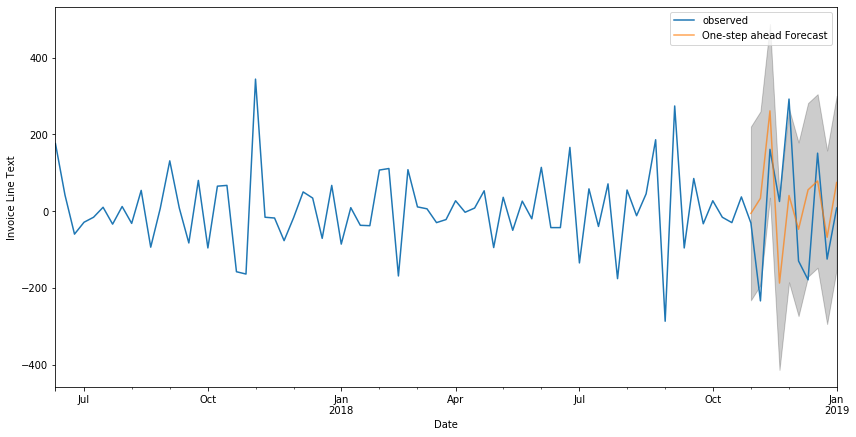

In [42]:
pred = results.get_prediction(start=pd.to_datetime('2018-11-04'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = weekly_diff['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Invoice Line Text')
plt.legend()
plt.show()

In [43]:
y_predicted = pred.predicted_mean
y_true = weekly_diff['2018-11-04':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))

Mean Square Error is: 26522.677


In [44]:
print('Root Mean Square Error is:', np.sqrt(mse))

Root Mean Square Error is: 162.8578429946196


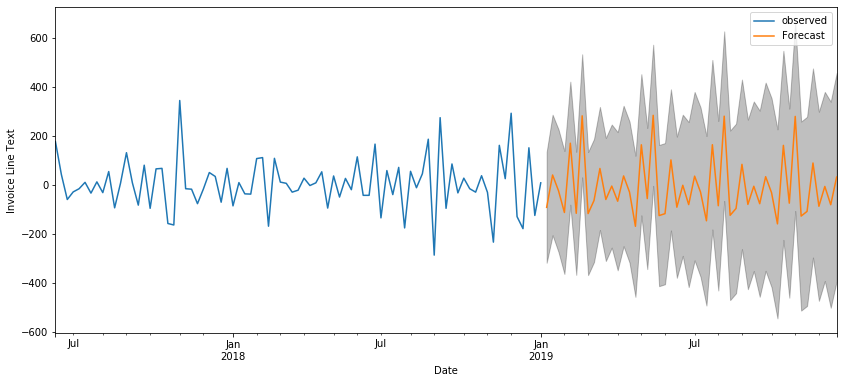

In [45]:
# Forecasting the future (out of sample) values.
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = weekly_diff.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Invoice Line Text')
plt.legend()
plt.show()

- Forecasting 1 year of Total Invoice Line Text so in next file single Invoice Line Text with Vehcile Model is combined. 